Bài toán: Phân loại ung thư vú (Benign / Malignant)

Loại bài toán: Binary Classification

Thuật toán: Support Vector Machine (SVM)

Loss function: Hinge Loss

Tối ưu: Gradient Descent

Chuẩn hóa dữ liệu: Z-score (Standardization)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
pd_feat = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
pd_feat.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df_target = pd.DataFrame(cancer['target'], columns=['target'])
df_target.head()

,target
0,0
1,0
2,0
3,0
4,0


In [ ]:
df =pd.concat([pd_feat, df_target], axis=1)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
df['target'].value_counts()

,count
target,
1,357
0,212


<Axes: xlabel='target', ylabel='count'>

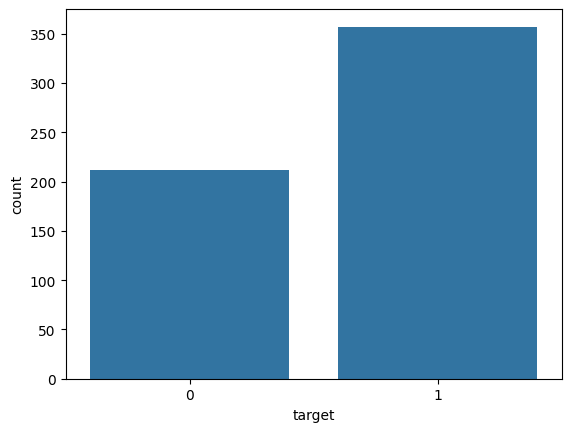

In [ ]:
sns.countplot(data=df, x='target')

In [ ]:
df.corr()['target'].sort_values(ascending=False)

,target
target,1.000000
smoothness error,0.067016
mean fractal dimension,0.012838
texture error,0.008303
symmetry error,0.006522
fractal dimension error,-0.077972
concavity error,-0.253730
compactness error,-0.292999
worst fractal dimension,-0.323872
mean symmetry,-0.330499


<Axes: >

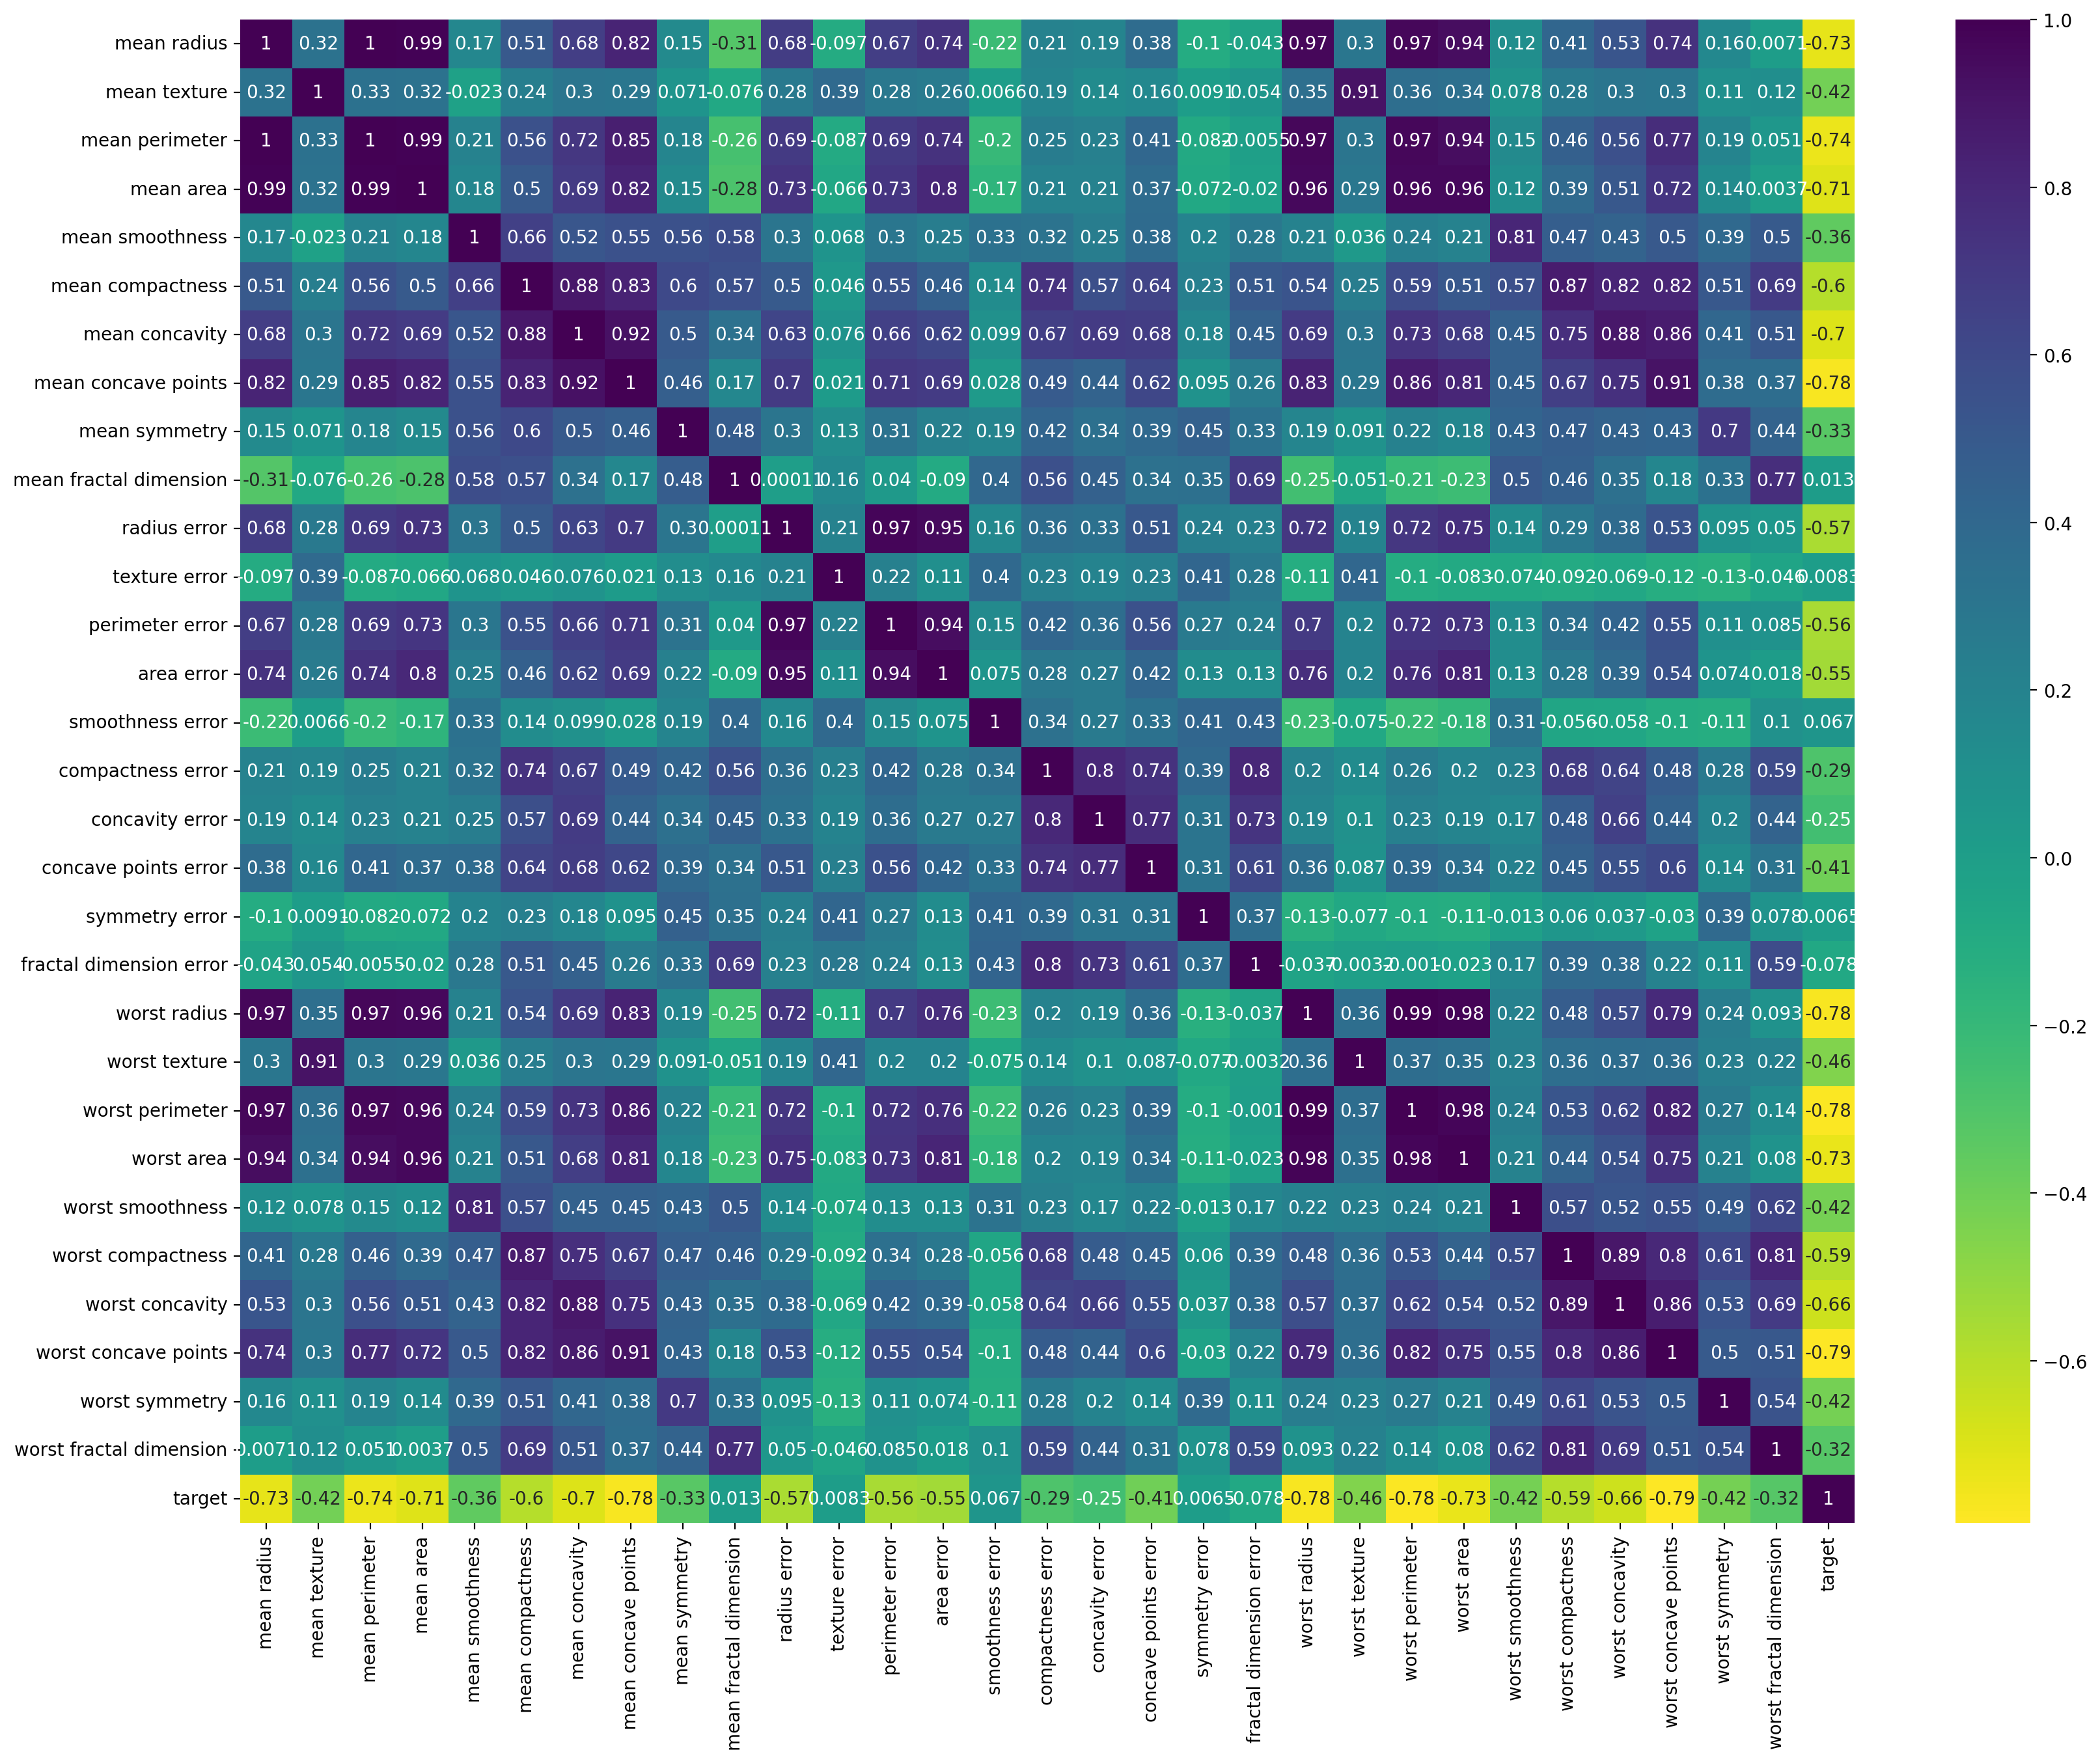

In [ ]:
plt.figure(figsize=(20,15),dpi=200)
sns.heatmap(df.corr(), annot=True,cmap='viridis_r')

In [ ]:

from sklearn.model_selection import train_test_split



Load dữ liệu

In [ ]:
data = load_breast_cancer()
X = data.data
y = data.target
y = np.where(y == 0, -1, 1)


Chia Train / Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.tolist()
X_test = X_test.tolist()
y_train = y_train.tolist()
y_test = y_test.tolist()


CHUẨN HÓA DỮ LIỆU (STANDARDIZATION)

Mean

In [ ]:
def mean(col):
    s = 0.0
    for x in col:
        s += x
    return s / len(col)


Standard Deviation

In [ ]:
def std(col, m):
    s = 0.0
    for x in col:
        s += (x - m) ** 2
    return (s / len(col)) ** 0.5


Chuẩn hóa TRAIN

In [ ]:
def standardize_train(X):
    n_features = len(X[0])
    columns = list(zip(*X))

    means = []
    stds = []

    for j in range(n_features):
        m = mean(columns[j])
        s = std(columns[j], m)
        means.append(m)
        stds.append(s)

    X_scaled = []
    for row in X:
        new_row = []
        for j in range(n_features):
            if stds[j] != 0:
                new_row.append((row[j] - means[j]) / stds[j])
            else:
                new_row.append(0)
        X_scaled.append(new_row)

    return X_scaled, means, stds


Chuẩn hóa TEST (dùng mean/std của TRAIN)

In [ ]:
def standardize_test(X, means, stds):
    X_scaled = []
    for row in X:
        new_row = []
        for j in range(len(row)):
            if stds[j] != 0:
                new_row.append((row[j] - means[j]) / stds[j])
            else:
                new_row.append(0)
        X_scaled.append(new_row)
    return X_scaled


Áp dụng chuẩn hóa

In [ ]:
X_train, means, stds = standardize_train(X_train)
X_test = standardize_test(X_test, means, stds)


SVM PHÂN LOẠI

Dot product

In [ ]:
def dot(a, b):
    s = 0.0
    for i in range(len(a)):
        s += a[i] * b[i]
    return s


Hinge Loss

In [ ]:
def hinge_loss(X, y, w, b, C):
    loss = 0
    for i in range(len(X)):
        loss += max(0, 1 - y[i] * (dot(w, X[i]) + b))
    reg = 0.5 * sum(wi * wi for wi in w)
    return reg + C * loss


Class SVM

In [ ]:
class SVM:
    def __init__(self, lr=0.001, C=1.0, epochs=500):
        self.lr = lr
        self.C = C
        self.epochs = epochs
        self.losses = []

    def fit(self, X, y):
        n_samples = len(X)
        n_features = len(X[0])

        self.w = [0.0] * n_features
        self.b = 0.0

        for _ in range(self.epochs):
            for i in range(n_samples):
                condition = y[i] * (dot(self.w, X[i]) + self.b)

                if condition >= 1:
                    for j in range(n_features):
                        self.w[j] -= self.lr * self.w[j]
                else:
                    for j in range(n_features):
                        self.w[j] -= self.lr * (self.w[j] - self.C * y[i] * X[i][j])
                    self.b += self.lr * self.C * y[i]

            self.losses.append(
                hinge_loss(X, y, self.w, self.b, self.C)
            )

    def predict(self, X):
        preds = []
        for x in X:
            val = dot(self.w, x) + self.b
            preds.append(1 if val >= 0 else -1)
        return preds


TRAIN – TEST – ĐÁNH GIÁ

In [ ]:
svm = SVM(lr=0.001, C=1.0, epochs=500)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)



In [ ]:
def accuracy(y_true, y_pred):
    correct = 0
    for i in range(len(y_true)):
        if y_true[i] == y_pred[i]:
            correct += 1
    return correct / len(y_true)

acc = accuracy(y_test, y_pred)
print("Accuracy:", acc)


Accuracy: 0.9385964912280702


Loss theo Epoch

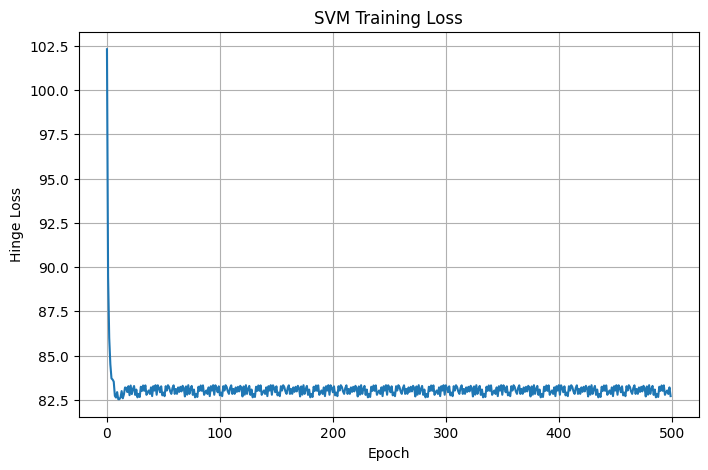

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(svm.losses)
plt.xlabel("Epoch")
plt.ylabel("Hinge Loss")
plt.title("SVM Training Loss")
plt.grid(True)
plt.show()


Accuracy

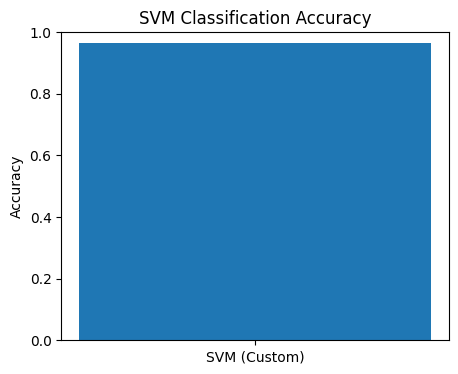

In [ ]:
plt.figure(figsize=(5,4))
plt.bar(["SVM (Custom)"], [acc])
plt.ylim(0,1)
plt.ylabel("Accuracy")
plt.title("SVM Classification Accuracy")
plt.show()


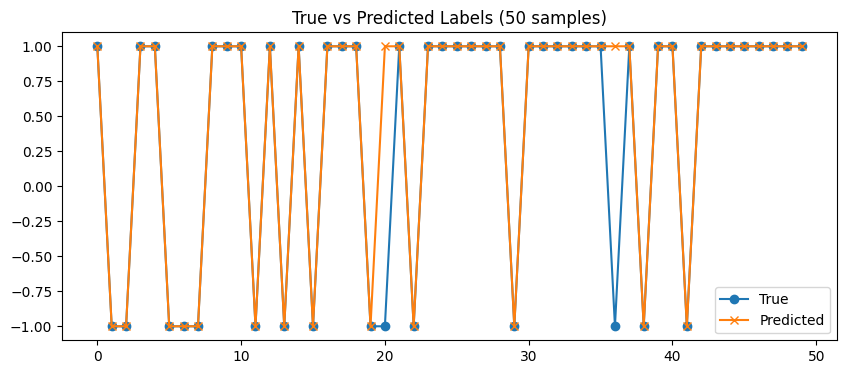

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(y_test[:50], label="True", marker='o')
plt.plot(y_pred[:50], label="Predicted", marker='x')
plt.legend()
plt.title("True vs Predicted Labels (50 samples)")
plt.show()
